>>> 자연어 처리 시 할 일 <hr>
- [1] 텍스트 데이터 => 말뭉치/코퍼스
- [2] 형태소 분리 => 토큰(문장, 단어, 문자)
- [3] 불필요한 토큰 제거 => 구두점 + 추가 / 빈도는 높지만 실질적인 의미가 없는 토큰(인칭대명사, 관사, 조사)
                           빈도가 낮은 단어라도 무조건 삭제 X. 주요한 의미를 가질 수 있기 때문에 확인...
- [4] 중복토큰, 의미가 동일한 토큰 통합 제거(어간 추출)
- [5] 텍스트 => 수치화

#### 자연어 처리
- 수집
- 정제 및 토큰화
- 불용어 / 구두점 제거
- 단어 사전 => {토큰 : 숫자} 형태로 맵핑 진행
- 데이터를 수치화

- [1] 모듈 로딩 및 데이터 준비 <hr>

In [102]:
# 모듈 로딩
from nltk.tokenize import word_tokenize, sent_tokenize, wordpunct_tokenize

In [103]:
# 데이터 준비
TEXT_FILE='./data/corpus_data.txt'

In [ ]:
# 파일에서 데이터 추출 => 'rt': 파일 읽기의 기본 모드값 
with open(TEXT_FILE, mode='rt', encoding='utf-8') as f:
    # 읽을 데이터 사이즈 지정한 만큼 읽기
    text_data100=f.read(100)
    f.seek(0)
    text_data=f.read()

In [ ]:
len(text_data100), len(text_data)     # 42053

In [104]:
#f.seek(0) # 이 메서드 사용하면 커서 위치 컨트롤 가능. 0 => 제일 앞

In [105]:
# 파일에서 데이터 추출 => 'rt' : 파일 읽기의 기본 모드값
# 라인 단위로 읽기 => readline()
with open(TEXT_FILE, mode='rt', encoding='utf-8') as f:
    all_data=[]
    while True:
        # 한 줄씩('\n') 읽기
        text_data=f.readline()
        if not text_data :
            break
        else : 
            all_data.append(text_data)

In [106]:
print(f'text_data => {len(text_data)}개, {text_data}')
print(f'all_data => {len(all_data)}개, {all_data}')

text_data => 0개, 
all_data => 149개, ['"The Tichborne Claimant" redirects here. For the 1998 film, see The Tichborne Claimant (film).\n', '\n', "The blended image (centre) was said by the Claimant's supporters to prove that Roger Tichborne (left, in 1853) and the Claimant (right, in 1874) were one and the same person.[n 1]\n", 'The Tichborne case was a legal cause célèbre that fascinated Victorian Britain in the 1860s and 1870s. It concerned the claims by a man sometimes referred to as Thomas Castro or as Arthur Orton, but usually termed "the Claimant", to be the missing heir to the Tichborne baronetcy. He failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.\n', '\n', "Roger Tichborne, heir to the family's title and fortunes, was presumed to have died in a shipwreck in 1854 at age 25. His mother clung to a belief that he might have survived, and after hearing rumours that he had made his way to Australia, she advertised extensively in Australian 

In [107]:
# 파일에서 데이터 추출 => 'rt' : 파일 읽기의 기본 모드값
# 라인 단위로 전체 읽기 => readlines()
with open(TEXT_FILE, mode='rt', encoding='utf-8') as f:
    # 한 줄씩('\n') 전체 읽어서 리스트에 담아서 반환
    text_data=f.readlines()

In [108]:
print(f'text_data => {len(text_data)}개, {text_data}')
for text in text_data : print(text)

text_data => 149개, ['"The Tichborne Claimant" redirects here. For the 1998 film, see The Tichborne Claimant (film).\n', '\n', "The blended image (centre) was said by the Claimant's supporters to prove that Roger Tichborne (left, in 1853) and the Claimant (right, in 1874) were one and the same person.[n 1]\n", 'The Tichborne case was a legal cause célèbre that fascinated Victorian Britain in the 1860s and 1870s. It concerned the claims by a man sometimes referred to as Thomas Castro or as Arthur Orton, but usually termed "the Claimant", to be the missing heir to the Tichborne baronetcy. He failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.\n', '\n', "Roger Tichborne, heir to the family's title and fortunes, was presumed to have died in a shipwreck in 1854 at age 25. His mother clung to a belief that he might have survived, and after hearing rumours that he had made his way to Australia, she advertised extensively in Australian newspapers, offer

- [2] 데이터 전처리 <hr>

>>> 줄바꿈 문자('\n') 처리

In [109]:
# 예) ['abcd\n', '\n', 'aaaa  dfdf\n']
all_text=[]
for text in text_data:
    text=text.replace('\n','') # 줄바꿈 문자는 공백으로 => 공백은`` 저장하지 않게
    if len(text): all_text.append(text)
print(f'all_text => {len(all_text)}개')

all_text => 87개


>>> 대소문자 통일

In [110]:
# ( for a in b ) : Generator 생성
all_text=(text.lower() for text in all_text) # 대괄호 처리하면 리스트, 소괄호로 처리하면 제너레이터로 동작

In [111]:
# # 제너레이터에서 데이터 추출
# for _ in all_text:
#     print(_)

>>> 토큰화

In [112]:
all_tokens=[]
for text in all_text:
    all_tokens.append(wordpunct_tokenize(text))

In [113]:
print(f'all_tokens => {len(all_tokens)}개')

all_tokens => 87개


>>> 불용어 & 구두점 제거

In [114]:
# 불용어 추출
from nltk.corpus import stopwords
import string

eng_stopwords=stopwords.words('english')
pun=list(string.punctuation)

In [115]:
# 불용어, 구두점, 길이 2이하 토큰(전치사 등...), 숫자(연도 등등...) 삭제
for tokenList in all_tokens:
    for token in tokenList[::-1]:
        if (token in eng_stopwords) or (token in pun) or (len(token)<=2) or (token.isnumeric()):
            tokenList.remove(token)


In [116]:
for tokenList in all_tokens:
    print(tokenList)

['tichborne', 'claimant', 'redirects', 'film', 'see', 'tichborne', 'claimant', 'film']
['blended', 'image', 'centre', 'said', 'claimant', 'supporters', 'prove', 'roger', 'tichborne', 'left', 'claimant', 'right', 'one', 'person']
['tichborne', 'case', 'legal', 'cause', 'célèbre', 'fascinated', 'victorian', 'britain', '1860s', '1870s', 'concerned', 'claims', 'man', 'sometimes', 'referred', 'thomas', 'castro', 'arthur', 'orton', 'usually', 'termed', 'claimant', 'missing', 'heir', 'tichborne', 'baronetcy', 'failed', 'convince', 'courts', 'convicted', 'perjury', 'served', 'year', 'prison', 'sentence']
['roger', 'tichborne', 'heir', 'family', 'title', 'fortunes', 'presumed', 'died', 'shipwreck', 'age', 'mother', 'clung', 'belief', 'might', 'survived', 'hearing', 'rumours', 'made', 'way', 'australia', 'advertised', 'extensively', 'australian', 'newspapers', 'offering', 'reward', 'information', 'wagga', 'wagga', 'butcher', 'known', 'thomas', 'castro', 'came', 'forward', 'claiming', 'roger', 't

>>> 단어별 빈도수 계산

In [117]:
from collections import Counter

In [118]:
# 토큰을 키로 해서 빈도수 저장
token_freqs={}

# 라인별 토큰을 읽어서 빈도 체크
for tokenList in all_tokens:
    for token in tokenList:
        # 토큰 키가 존재하지 않으면 키로 추가 후 1로 설정
        if token not in token_freqs:
            token_freqs[token]=1
        # 이미 존재하는 토큰이면 값을 1 증가
        else:
            token_freqs[token] +=1

In [119]:
token_freqs

{'tichborne': 97,
 'claimant': 115,
 'redirects': 1,
 'film': 4,
 'see': 1,
 'blended': 1,
 'image': 1,
 'centre': 2,
 'said': 5,
 'supporters': 8,
 'prove': 2,
 'roger': 62,
 'left': 6,
 'right': 2,
 'one': 13,
 'person': 2,
 'case': 23,
 'legal': 12,
 'cause': 3,
 'célèbre': 1,
 'fascinated': 1,
 'victorian': 1,
 'britain': 1,
 '1860s': 1,
 '1870s': 1,
 'concerned': 2,
 'claims': 2,
 'man': 4,
 'sometimes': 4,
 'referred': 1,
 'thomas': 8,
 'castro': 15,
 'arthur': 22,
 'orton': 41,
 'usually': 1,
 'termed': 1,
 'missing': 5,
 'heir': 4,
 'baronetcy': 4,
 'failed': 5,
 'convince': 3,
 'courts': 4,
 'convicted': 3,
 'perjury': 5,
 'served': 3,
 'year': 5,
 'prison': 3,
 'sentence': 4,
 'family': 32,
 'title': 3,
 'fortunes': 2,
 'presumed': 3,
 'died': 9,
 'shipwreck': 2,
 'age': 2,
 'mother': 6,
 'clung': 1,
 'belief': 3,
 'might': 6,
 'survived': 1,
 'hearing': 3,
 'rumours': 2,
 'made': 7,
 'way': 1,
 'australia': 13,
 'advertised': 1,
 'extensively': 1,
 'australian': 3,
 'newspap

In [120]:
# 빈도별로 몇 개의 단어가 존재하는지 체크
token_freqs.items()

dict_items([('tichborne', 97), ('claimant', 115), ('redirects', 1), ('film', 4), ('see', 1), ('blended', 1), ('image', 1), ('centre', 2), ('said', 5), ('supporters', 8), ('prove', 2), ('roger', 62), ('left', 6), ('right', 2), ('one', 13), ('person', 2), ('case', 23), ('legal', 12), ('cause', 3), ('célèbre', 1), ('fascinated', 1), ('victorian', 1), ('britain', 1), ('1860s', 1), ('1870s', 1), ('concerned', 2), ('claims', 2), ('man', 4), ('sometimes', 4), ('referred', 1), ('thomas', 8), ('castro', 15), ('arthur', 22), ('orton', 41), ('usually', 1), ('termed', 1), ('missing', 5), ('heir', 4), ('baronetcy', 4), ('failed', 5), ('convince', 3), ('courts', 4), ('convicted', 3), ('perjury', 5), ('served', 3), ('year', 5), ('prison', 3), ('sentence', 4), ('family', 32), ('title', 3), ('fortunes', 2), ('presumed', 3), ('died', 9), ('shipwreck', 2), ('age', 2), ('mother', 6), ('clung', 1), ('belief', 3), ('might', 6), ('survived', 1), ('hearing', 3), ('rumours', 2), ('made', 7), ('way', 1), ('aust

In [121]:
# 빈도수별로 단어 또는 단어 개수 저장
freqsDict={}
for k,v in token_freqs.items():
    if v not in freqsDict:
        freqsDict[v]=[1,[k]]
    else : 
        freqsDict[v][1].append(k)
        freqsDict[v][0] +=1

print(freqsDict)


{97: [1, ['tichborne']], 115: [1, ['claimant']], 1: [1054, ['redirects', 'see', 'blended', 'image', 'célèbre', 'fascinated', 'victorian', 'britain', '1860s', '1870s', 'referred', 'usually', 'termed', 'clung', 'survived', 'way', 'advertised', 'extensively', 'forward', 'claiming', 'manners', 'unrefined', 'gathered', 'instantly', 'dismissive', 'protracted', 'emerged', 'suggesting', 'charged', 'gain', 'passing', 'condemned', 'instigated', 'reform', 'championed', 'elected', 'independent', 'effective', 'parliamentarian', 'decline', 'dealings', 'recant', 'poverty', 'view', 'analysts', 'believe', 'element', 'conceivably', 'norman', 'conquest', 'reformation', '16th', 'century', 'number', 'hanged', 'drawn', 'quartered', 'complicity', 'babington', 'plot', 'assassinate', 'elizabeth', 'loyal', 'benjamin', 'services', 'king', 'tree', 'simplified', 'extinct', '14th', 'seventh', 'travelling', 'verdun', 'peace', 'amiens', 'broke', 'reigniting', 'napoleonic', 'wars', 'enemy', 'citizen', 'detained', 'hel

In [122]:
sorted(freqsDict.items(), reverse=True)

[(115, [1, ['claimant']]),
 (97, [1, ['tichborne']]),
 (62, [1, ['roger']]),
 (41, [1, ['orton']]),
 (32, [1, ['family']]),
 (23, [2, ['case', 'sir']]),
 (22, [2, ['arthur', 'kenealy']]),
 (19, [1, ['lady']]),
 (18, [3, ['son', 'court', 'years']]),
 (16, [1, ['trial']]),
 (15, [1, ['castro']]),
 (14, [3, ['wagga', 'although', 'name']]),
 (13, [6, ['one', 'australia', 'england', 'may', 'doughty', 'would']]),
 (12, [2, ['legal', 'evidence']]),
 (11,
  [8,
   ['information',
    'london',
    'edward',
    'james',
    'henry',
    'former',
    '".[',
    'witnesses']]),
 (10, [5, ['support', 'accepted', 'civil', 'bogle', 'cockburn']]),
 (9, [4, ['died', 'john', 'ship', 'including']]),
 (8,
  [12,
   ['supporters',
    'thomas',
    'details',
    'wapping',
    'identity',
    'became',
    'later',
    'two',
    'first',
    'could',
    'ballantine',
    'hawkins']]),
 (7,
  [19,
   ['made',
    'butcher',
    'park',
    'remained',
    'daughter',
    'much',
    'katherine',
    '

- [3] 단어집합/단어사전 생성 <hr>
* 단어:숫자 형태로 맵핑
* 나의 데이터셋을 숫자로 변환하기 위한 인코딩(Encoding)표
* 문장 => 수치화 진행 시 길이를 동일하게 맞추는 작업 즉, 패딩
    - 패딩에 사용되는 토큰 'PAD'키, 값은 0로 지정
* 테스트 또는 검증에 입력되는 텍스트 => 단어사전/집합에 존재하지 않는 단어
    - 존재하지 않는 토큰 'OOV' 또는 'UNK' 키, 값은 1로 지정

In [123]:
# 빈도가 높게 나오는 순서대로 단어 정렬
sorted_tokens=sorted(token_freqs.items(),key=lambda x:x[1],reverse=True)
print(sorted_tokens)


[('claimant', 115), ('tichborne', 97), ('roger', 62), ('orton', 41), ('family', 32), ('case', 23), ('sir', 23), ('arthur', 22), ('kenealy', 22), ('lady', 19), ('son', 18), ('court', 18), ('years', 18), ('trial', 16), ('castro', 15), ('wagga', 14), ('although', 14), ('name', 14), ('one', 13), ('australia', 13), ('england', 13), ('may', 13), ('doughty', 13), ('would', 13), ('legal', 12), ('evidence', 12), ('information', 11), ('london', 11), ('edward', 11), ('james', 11), ('henry', 11), ('former', 11), ('".[', 11), ('witnesses', 11), ('support', 10), ('accepted', 10), ('civil', 10), ('bogle', 10), ('cockburn', 10), ('died', 9), ('john', 9), ('ship', 9), ('including', 9), ('supporters', 8), ('thomas', 8), ('details', 8), ('wapping', 8), ('identity', 8), ('became', 8), ('later', 8), ('two', 8), ('first', 8), ('could', 8), ('ballantine', 8), ('hawkins', 8), ('made', 7), ('butcher', 7), ('park', 7), ('remained', 7), ('daughter', 7), ('much', 7), ('katherine', 7), ('june', 7), ('april', 7), (

In [124]:
# 단어사전 생성 및 초기화
# 특수토큰 : 'PAD', 'OOV' 또는 'UNK'
PAD_TOKEN, OOV_TOKEN='PAD', 'OOV'

vocab={'PAD' : 0, 'OOV': 1}

In [128]:
# 데이터 코퍼스에서 추출된 토큰(단어)들
for idx, tk in enumerate(sorted_tokens, 2):
    vocab[tk[0]]=idx
print(vocab)

{'PAD': 0, 'OOV': 1, 'claimant': 2, 'tichborne': 3, 'roger': 4, 'orton': 5, 'family': 6, 'case': 7, 'sir': 8, 'arthur': 9, 'kenealy': 10, 'lady': 11, 'son': 12, 'court': 13, 'years': 14, 'trial': 15, 'castro': 16, 'wagga': 17, 'although': 18, 'name': 19, 'one': 20, 'australia': 21, 'england': 22, 'may': 23, 'doughty': 24, 'would': 25, 'legal': 26, 'evidence': 27, 'information': 28, 'london': 29, 'edward': 30, 'james': 31, 'henry': 32, 'former': 33, '".[': 34, 'witnesses': 35, 'support': 36, 'accepted': 37, 'civil': 38, 'bogle': 39, 'cockburn': 40, 'died': 41, 'john': 42, 'ship': 43, 'including': 44, 'supporters': 45, 'thomas': 46, 'details': 47, 'wapping': 48, 'identity': 49, 'became': 50, 'later': 51, 'two': 52, 'first': 53, 'could': 54, 'ballantine': 55, 'hawkins': 56, 'made': 57, 'butcher': 58, 'park': 59, 'remained': 60, 'daughter': 61, 'much': 62, 'katherine': 63, 'june': 64, 'april': 65, 'bella': 66, 'lost': 67, 'sydney': 68, 'william': 69, 'examination': 70, 'found': 71, 'many':

In [133]:
# 텍스트 문장 => 수치화 [인코딩]
encodingData=[]
for tokenList in all_tokens:
    # 1개 문장 인코딩
    sent=[]
    print(f'문장 : {tokenList}')
    for token in tokenList:
        sent.append(vocab[token])
    
    # 인코딩 된 문장 저장
    encodingData.append(sent)
    print(f'=> 인코딩 : {sent}\n')

문장 : ['tichborne', 'claimant', 'redirects', 'film', 'see', 'tichborne', 'claimant', 'film']
=> 인코딩 : [3, 2, 611, 135, 612, 3, 2, 135]

문장 : ['blended', 'image', 'centre', 'said', 'claimant', 'supporters', 'prove', 'roger', 'tichborne', 'left', 'claimant', 'right', 'one', 'person']
=> 인코딩 : [613, 614, 328, 92, 2, 45, 329, 4, 3, 76, 2, 330, 20, 331]

문장 : ['tichborne', 'case', 'legal', 'cause', 'célèbre', 'fascinated', 'victorian', 'britain', '1860s', '1870s', 'concerned', 'claims', 'man', 'sometimes', 'referred', 'thomas', 'castro', 'arthur', 'orton', 'usually', 'termed', 'claimant', 'missing', 'heir', 'tichborne', 'baronetcy', 'failed', 'convince', 'courts', 'convicted', 'perjury', 'served', 'year', 'prison', 'sentence']
=> 인코딩 : [3, 7, 26, 215, 615, 616, 617, 618, 619, 620, 332, 333, 136, 137, 621, 46, 16, 9, 5, 622, 623, 2, 93, 138, 3, 139, 94, 216, 140, 217, 95, 218, 96, 219, 141]

문장 : ['roger', 'tichborne', 'heir', 'family', 'title', 'fortunes', 'presumed', 'died', 'shipwreck', 'a

- [4] 패딩(Padding) <hr>
* 길이가 다른 문장들의 길이를 일치시키기
    - 가장 긴 문장을 기준으로 나머지 문장들은 PAD 토큰으로 채우기
    - 개발자 지정 길이를 기준으로 문장들의 길이를 조절
        * 지정 길이보다 긴 경우 : 자르기 (앞부분/뒷부분 중 선택)
        * 지정 길이보다 짧은 경우 : PAD 토큰으로 채우기 

In [143]:
# 문장들 마다 길이 체크
dataLen=[len(sent) for sent in encodingData]
print(dataLen)

[8, 14, 35, 58, 59, 56, 3, 3, 42, 10, 85, 48, 61, 67, 2, 8, 95, 7, 67, 78, 2, 1, 7, 56, 59, 62, 112, 2, 6, 65, 62, 2, 2, 8, 112, 134, 117, 2, 3, 6, 76, 2, 36, 67, 62, 4, 5, 50, 3, 7, 99, 54, 101, 2, 92, 2, 9, 75, 68, 43, 4, 2, 14, 59, 108, 1, 6, 78, 89, 28, 69, 3, 82, 64, 1, 2, 7, 143, 4, 5, 50, 81, 1, 61, 62, 93, 78]


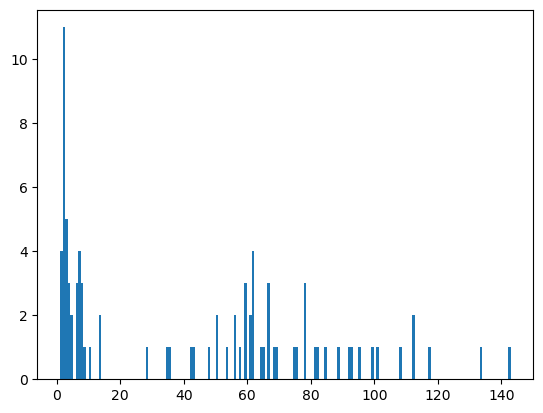

In [142]:
import matplotlib.pyplot as plt

plt.hist(dataLen, bins=len(dataLen)*2)
plt.show()

In [144]:
# 기준 길이
MAX_LENGTH=max(dataLen)

In [146]:
# [1] 가장 긴 문장 길이 기준
for idx, sent in enumerate(encodingData):
    cur_length=len(sent)
    if cur_length < MAX_LENGTH:
        encodingData[idx]=sent+([0]*(MAX_LENGTH-cur_length))

In [148]:
for _ in encodingData[:3]:
    print(len(_), _)

143 [3, 2, 611, 135, 612, 3, 2, 135, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
143 [613, 614, 328, 92, 2, 45, 329, 4, 3, 76, 2, 330, 20, 331, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
143 [3, 7, 26, 215, 615, 616, 617, 618, 619, 620, 332, 333, 136, 137, 621, 46, 16, 9, 5, 622, 623, 2, 93, 13

In [149]:
# 기준 길이
MAX_LENGTH=100

In [ ]:
# [2] 가장 긴 문장 길이 기준
for idx, sent in enumerate(encodingData):
    cur_length=len(sent)
    if cur_length < MAX_LENGTH:
        encodingData[idx]=sent+([0]*(MAX_LENGTH-cur_length))
    else: 
        # 앞부분 제거 시
        encodingData[idx]=sent[cur_length-MAX_LENGTH :]
        ## 뒷부분 제거 시
        #encodingData[idx]=sent[:MAX_LENGTH]